In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for AWS compute node


# Global

In [54]:
classifier_id = 37
warp_setting = 1

Setting environment for AWS compute node


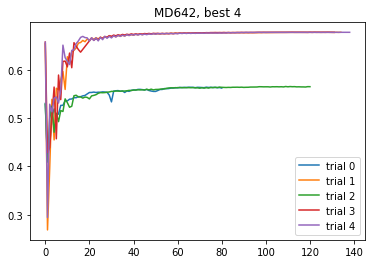

In [55]:
# See one stack

stack = 'MD642'

scores_all_trials = []

for trial_idx in range(5):
    try:
        fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
                                               classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                                    downscale=32, trial_idx=trial_idx)
        scores = bp.unpack_ndarray_file(fp)
        scores_all_trials.append(scores)
        plt.plot(scores, label='trial '+ str(trial_idx));
    except Exception as e:
        sys.stderr.write('Scores for trial %d does not exist.\n' % (trial_idx))
        continue

best_scores_each_trial = np.argsort([np.max(scores) for scores in scores_all_trials])
if len(best_scores_each_trial) > 0:
    best_trial = best_scores_each_trial[-1]

plt.title('%s, best %d' % (stack, best_trial));
plt.legend()
plt.show()

In [56]:
best_trial_index_fp = DataManager.get_best_trial_index_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
                                               classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                                    downscale=32)
create_parent_dir_if_not_exists(best_trial_index_fp)
with open(best_trial_index_fp, 'w') as f:
    f.write(str(best_trial))
    
upload_to_s3(best_trial_index_fp)

aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_bestTrial.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_bestTrial.txt


Child returned 0
0.48 seconds.


In [ ]:
# See many stacks

nc = 4
nr = int(np.ceil(len(['MD590', 'MD590'])/float(nc)))
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(nc*5,nr*3));
axes = axes.flatten()

for i, stack in enumerate(sorted(['MD590', 'MD590'])):
    
    scores_all_trials = []
    for trial_idx in range(5):
        fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
                                               classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                                    downscale=32, trial_idx=trial_idx)
        scores = bp.unpack_ndarray_file(fp)
        scores_all_trials.append(scores)
        axes[i].plot(scores, label='trial '+ str(trial_idx));

    best_scores_each_trial = np.argsort([np.max(scores) for scores in scores_all_trials])
    if len(best_scores_each_trial) > 0:
        best_trial = best_scores_each_trial[-1]
#         scores = scores_all_trials[best_trial]        
#         axes[i].plot(scores, label='trial '+ str(best_trial));
        
    axes[i].set_title('%s, best %d' % (stack, best_trial));
    axes[i].set_xlabel('Iteration');
    axes[i].set_ylabel('Registration score');
    axes[i].legend();

plt.tight_layout()
plt.show()

# Local

In [60]:
classifier_id = 37
warp_setting = 5

In [61]:
# One stack, all structures, all trials

stack = 'MD642'

Scores for (outerContour, 0) does not exist.
Scores for (outerContour, 1) does not exist.
Scores for (outerContour, 2) does not exist.
Scores for (outerContour, 3) does not exist.
Scores for (outerContour, 4) does not exist.
Scores for (sp5, 0) does not exist.
Scores for (sp5, 1) does not exist.
Scores for (sp5, 2) does not exist.
Scores for (sp5, 3) does not exist.
Scores for (sp5, 4) does not exist.


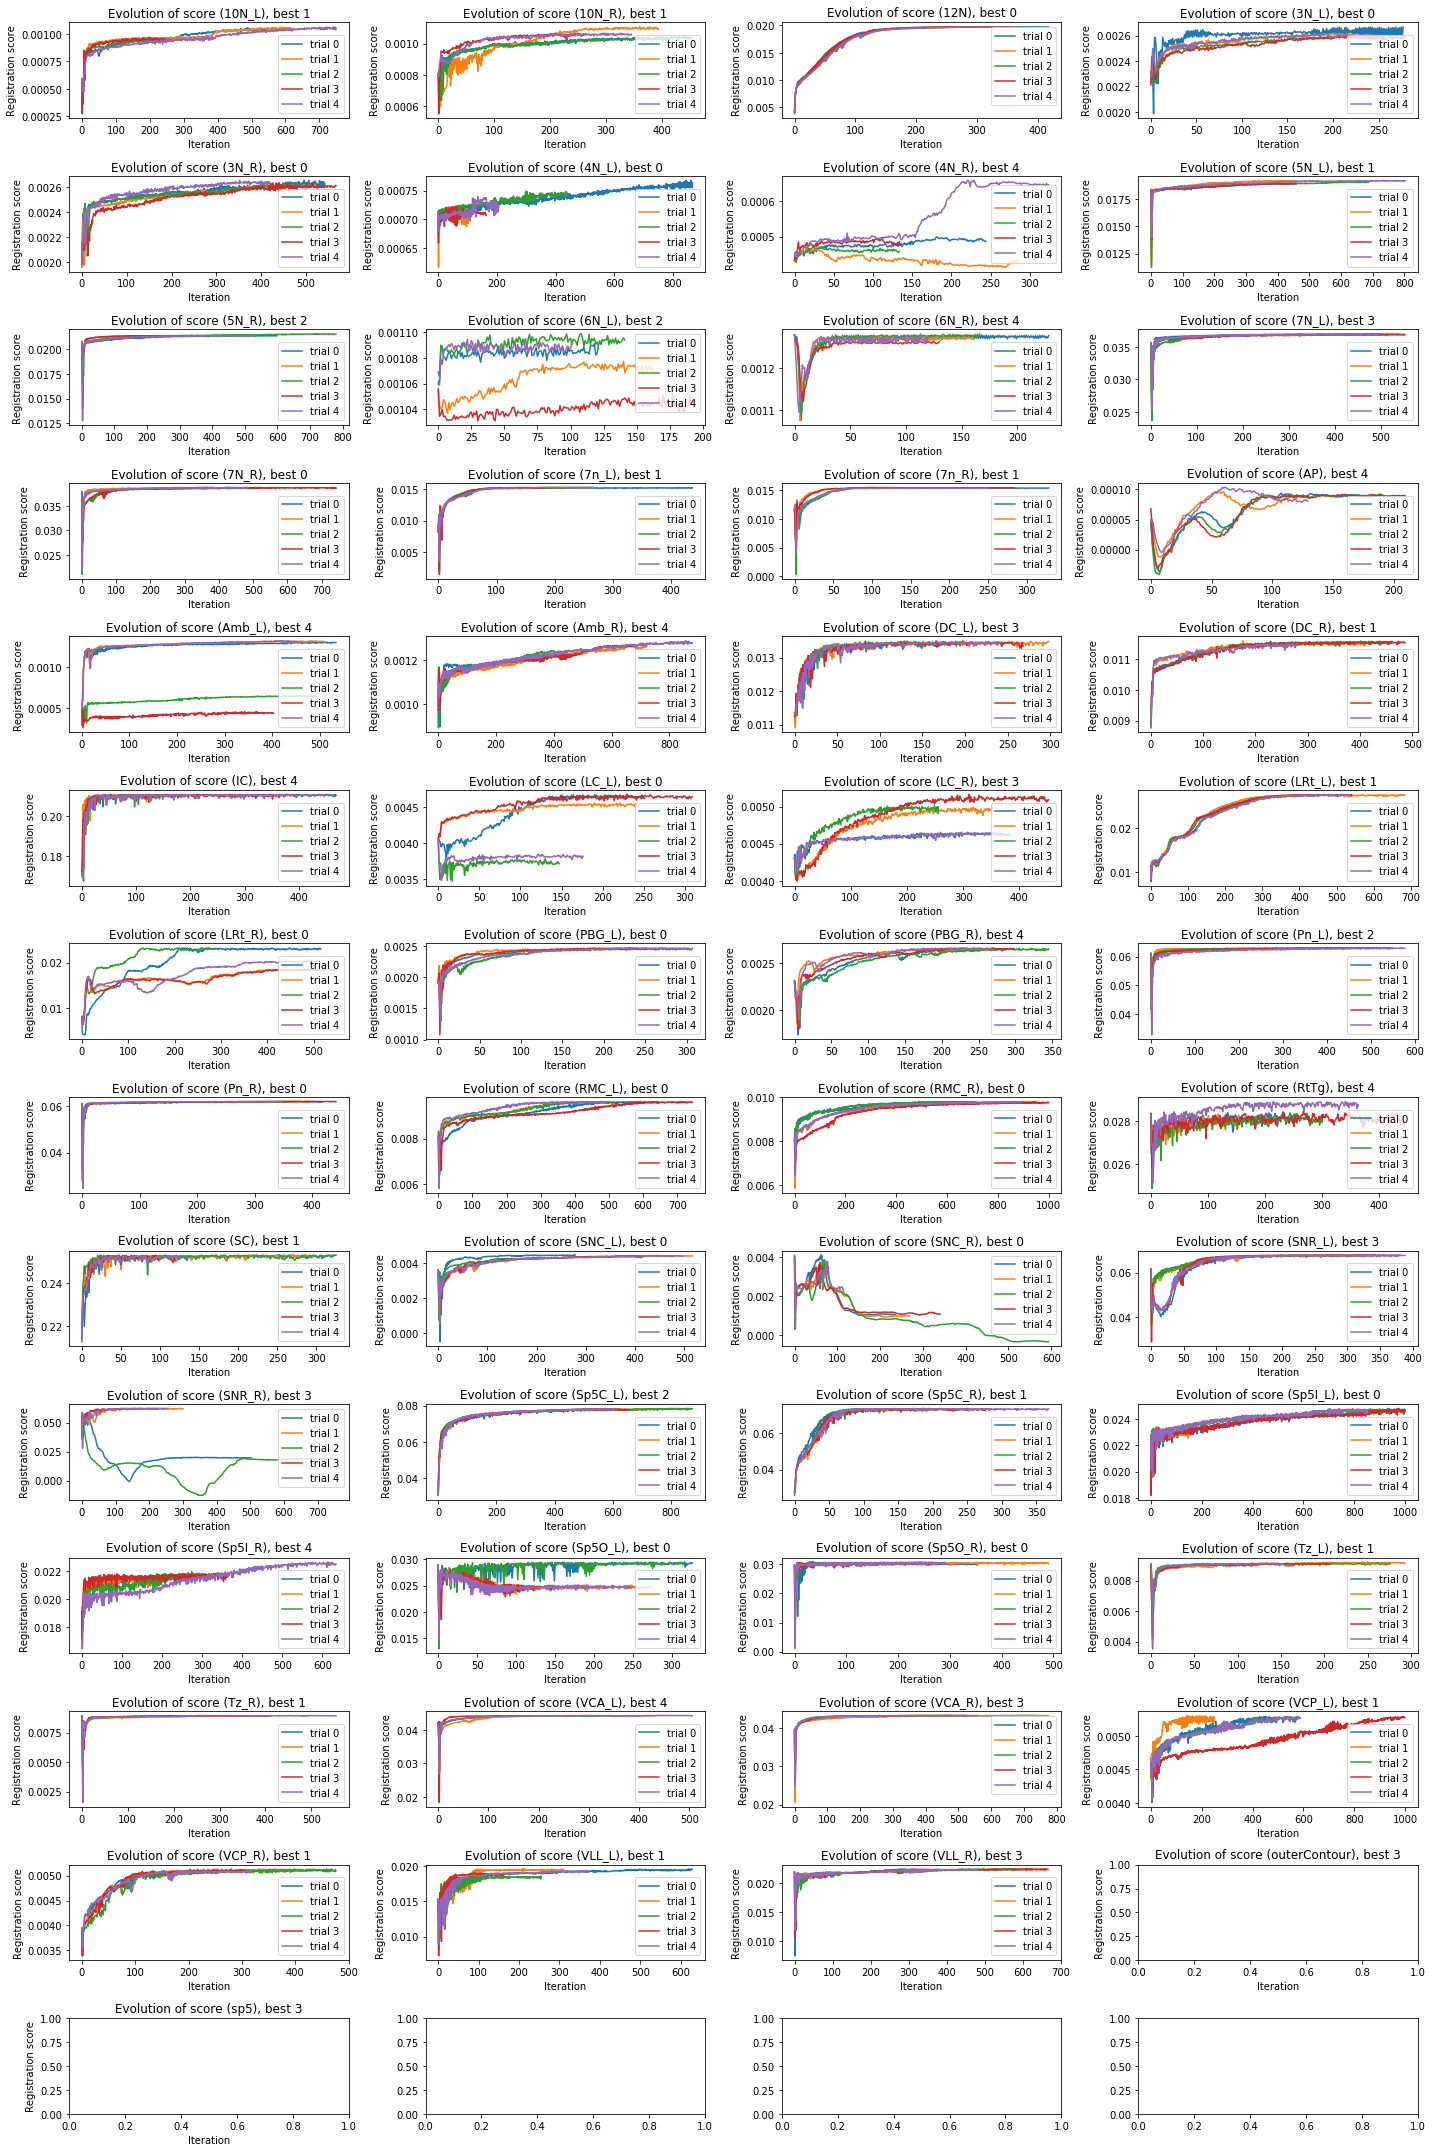

In [62]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(all_known_structures_sided)/4.)), ncols=4, figsize=(20,30));
axes = axes.flatten()

best_trial_by_structure = {}

for i, structure in enumerate(sorted(all_known_structures_sided)):
    
    scores_all_trials = []
    
    for trial_idx in range(5):
        try:
            fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
                                                   classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                                   param_suffix=structure, downscale=32, trial_idx=trial_idx)
            scores = bp.unpack_ndarray_file(fp)
            scores_all_trials.append(scores)
            axes[i].plot(scores, label='trial '+ str(trial_idx));
        except Exception as e:
            sys.stderr.write('Scores for (%s, %d) does not exist.\n' % (structure, trial_idx))
            continue

    best_scores_each_trial = np.argsort([np.max(scores) for scores in scores_all_trials])
    if len(best_scores_each_trial) > 0:
        best_trial = best_scores_each_trial[-1]
        scores = scores_all_trials[best_trial]       
#         axes[i].plot(scores, label='trial '+ str(best_trial));
        best_trial_by_structure[structure] = best_trial
        
    axes[i].set_title('Evolution of score (%s), best %d' % (structure, best_trial));
    axes[i].set_xlabel('Iteration');
    axes[i].set_ylabel('Registration score');
    axes[i].legend();    

plt.tight_layout()
plt.show()

In [63]:
for structure, best_trial in best_trial_by_structure.iteritems():
    best_trial_index_fp = DataManager.get_best_trial_index_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
                                               classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                                    downscale=32, param_suffix=structure)
    create_parent_dir_if_not_exists(best_trial_index_fp)
    with open(best_trial_index_fp, 'w') as f:
        f.write(str(best_trial))

    upload_to_s3(best_trial_index_fp)

aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_LRt_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_LRt_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5C_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5C_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Pn_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Pn_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_7N_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_7N_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_PBG_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_PBG_L.txt


Child returned 0
0.34 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VLL_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VLL_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VLL_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VLL_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_7N_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_7N_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_PBG_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_PBG_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_RtTg.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_RtTg.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5C_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5C_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Pn_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Pn_R.txt


Child returned 0
0.44 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_LRt_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_LRt_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5O_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5O_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SNR_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SNR_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_12N.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_12N.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SNR_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SNR_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5O_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5O_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_RMC_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_RMC_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_DC_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_DC_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VCA_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VCA_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_3N_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_3N_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_6N_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_6N_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5I_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5I_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_RMC_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_RMC_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_5N_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_5N_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SNC_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SNC_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SNC_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SNC_R.txt


Child returned 0
0.39 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_AP.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_AP.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_5N_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_5N_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5I_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Sp5I_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_3N_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_3N_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_6N_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_6N_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_IC.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_IC.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VCA_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VCA_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_DC_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_DC_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Amb_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Amb_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VCP_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VCP_R.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_LC_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_LC_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_10N_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_10N_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_7n_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_7n_R.txt


Child returned 0
0.39 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_4N_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_4N_R.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Tz_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Tz_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Tz_R.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Tz_R.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_7n_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_7n_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_4N_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_4N_L.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_LC_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_LC_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_10N_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_10N_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SC.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_SC.txt


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VCP_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_VCP_L.txt


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Amb_L.txt s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial/atlasV3_down32_scoreVolume_clf_37_warp_5_MD642_down32_scoreVolume_clf_37_bestTrial_Amb_L.txt


Child returned 0
0.38 seconds.


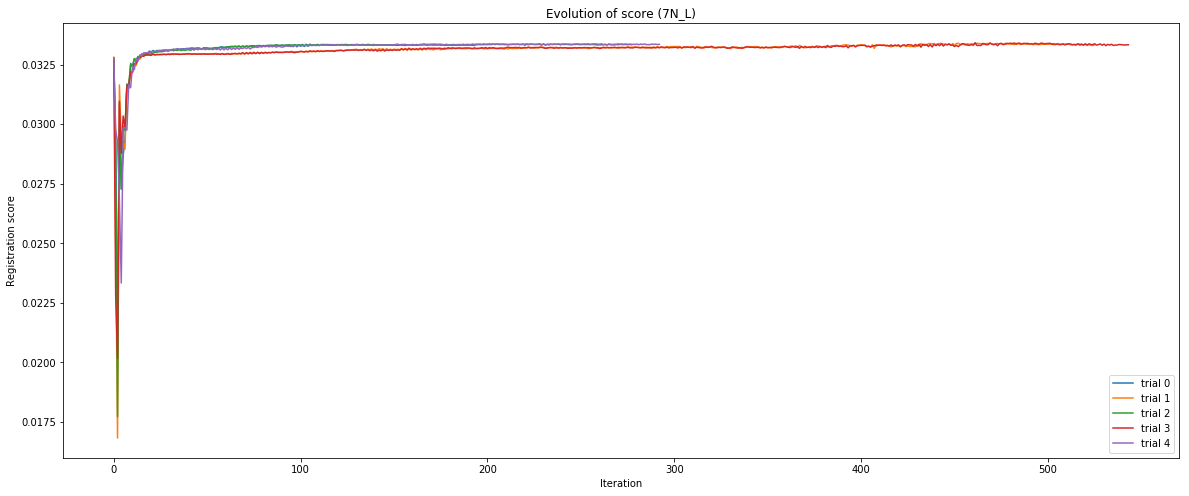

In [11]:
# One stack, one structure, all trials

structure = '7N_L'
plt.figure(figsize=(20,8));
for trial_idx in range(5):
    try:
        fp = DataManager.get_score_history_filepath(stack_m='atlasV3', stack_f=stack, warp_setting=warp_setting, 
                                               classifier_setting_m=classifier_id, classifier_setting_f=classifier_id, 
                                               param_suffix=structure, downscale=32, trial_idx=trial_idx)
        scores = bp.unpack_ndarray_file(fp)

        plt.plot(scores, label='trial '+ str(trial_idx));
        plt.title('Evolution of score (%s)' % structure);
        plt.xlabel('Iteration');
        plt.ylabel('Registration score');
    except:
        sys.stderr.write('Scores for %s does not exist.\n' % structure)
        continue
plt.legend()
plt.show()